<a href="https://colab.research.google.com/github/nelslindahlx/Data-Analysis/blob/master/TimelineofMajorFinancialBubbles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This bit of code shows a chart for the Timeline of Major Financial Bubbles

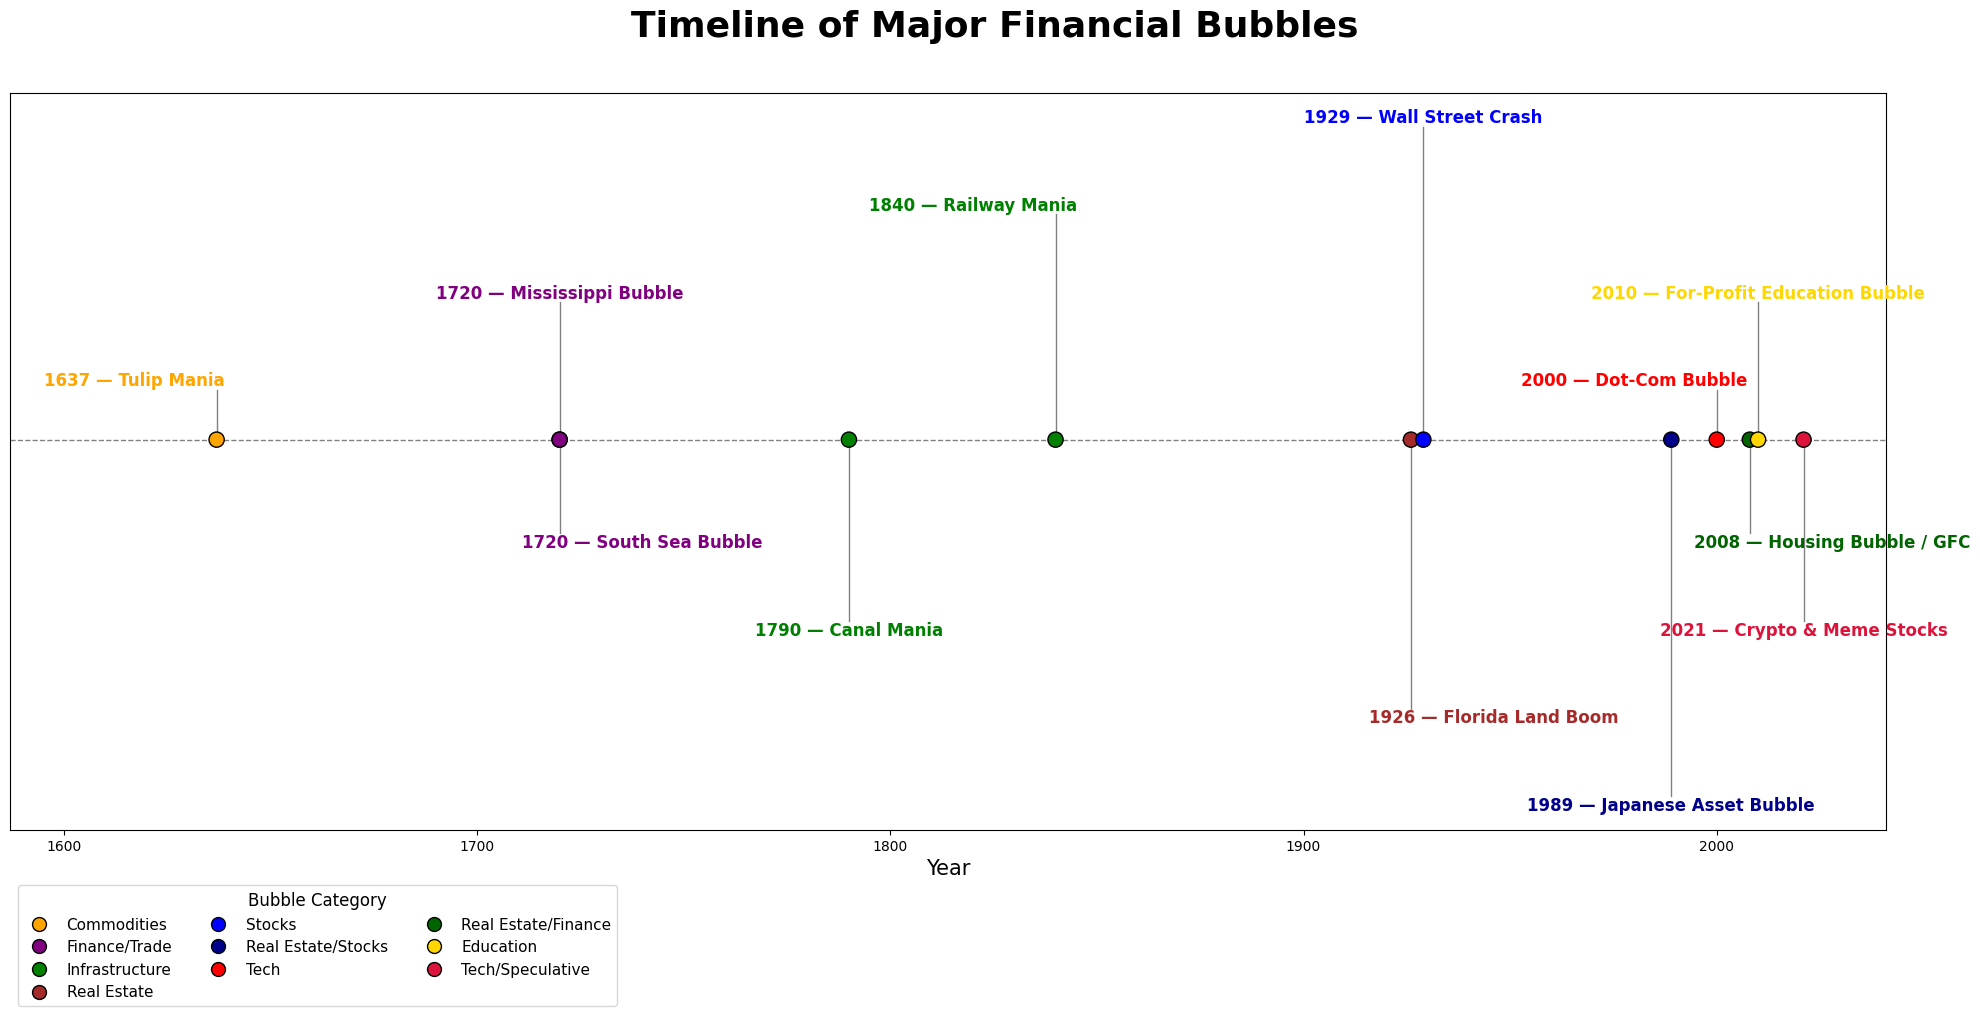

In [1]:
import matplotlib.pyplot as plt

# Bubble events with year, label, and category
bubbles = [
    (1637, "Tulip Mania", "Commodities"),
    (1720, "South Sea Bubble", "Finance/Trade"),
    (1720, "Mississippi Bubble", "Finance/Trade"),
    (1790, "Canal Mania", "Infrastructure"),
    (1840, "Railway Mania", "Infrastructure"),
    (1926, "Florida Land Boom", "Real Estate"),
    (1929, "Wall Street Crash", "Stocks"),
    (1989, "Japanese Asset Bubble", "Real Estate/Stocks"),
    (2000, "Dot-Com Bubble", "Tech"),
    (2008, "Housing Bubble / GFC", "Real Estate/Finance"),
    (2010, "For-Profit Education Bubble", "Education"),
    (2021, "Crypto & Meme Stocks", "Tech/Speculative")
]

years, labels, categories = zip(*bubbles)

# Assign colors by category
category_colors = {
    "Commodities": "orange",
    "Finance/Trade": "purple",
    "Infrastructure": "green",
    "Real Estate": "brown",
    "Stocks": "blue",
    "Real Estate/Stocks": "darkblue",
    "Tech": "red",
    "Real Estate/Finance": "darkgreen",
    "Education": "gold",
    "Tech/Speculative": "crimson"
}
colors = [category_colors[cat] for cat in categories]

plt.figure(figsize=(20, 10))

# Timeline base line and scatter points
plt.hlines(0, min(years)-50, max(years)+20, colors='gray', linestyles='dashed', linewidth=1)
plt.scatter(years, [0]*len(years), color=colors, s=120, zorder=5, edgecolors="black")

# Staggered annotation with less overlap
for i, (year, label, cat) in enumerate(bubbles):
    level = (i % 8) * 0.7 + 0.8
    ypos = level if i % 2 == 0 else -level
    x_adjust = -20 if (i % 4 == 0) else (20 if (i % 4 == 1) else 0)
    plt.plot([year, year], [0, ypos], color='gray', linewidth=1)
    plt.text(year + x_adjust, ypos, f"{year} — {label}",
             ha='center', va='bottom' if ypos > 0 else 'top',
             fontsize=12, fontweight='semibold', color=category_colors[cat])

# Title (single only)
plt.suptitle("Timeline of Major Financial Bubbles", fontsize=26, fontweight='bold', y=1.02)

# Remove duplicate internal title and axis labels
plt.yticks([])
plt.xlabel("Year", fontsize=15)
plt.xlim(min(years)-50, max(years)+20)

# Legend for categories (moved to bottom left)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cat,
                              markerfacecolor=col, markersize=10, markeredgecolor="black")
                   for cat, col in category_colors.items()]
plt.legend(handles=legend_elements, title="Bubble Category", loc="lower left", bbox_to_anchor=(0, -0.25),
           ncol=3, fontsize=11, title_fontsize=12)

plt.tight_layout()
plt.show()
